## Delta Variant

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
sns.set(rc={'figure.figsize':(50,50)})
sns.set_style('whitegrid')

In [6]:
delta = pd.read_csv('Delta_CAonly.txt', delim_whitespace=True)

In [7]:
delta.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
0,A13,6,0.600000,0.069051,0.000757,0.024558,30,8.833333
1,A14,8,0.607143,0.069915,0.002347,0.031714,30,8.375000
2,A15,12,0.378788,0.070223,0.009000,0.048462,30,8.083333
3,A16,6,0.733333,0.069996,0.000680,0.030797,30,10.000000
4,A17,8,0.535714,0.073699,0.002744,0.029518,29,7.750000


In [8]:
delta.dtypes

Node                        object
Degree                       int64
Cluster_Coeff              float64
Closeness                  float64
Betweenness                float64
Eigenvector_centrality     float64
Eccentricity                 int64
Average_neighbor_degree    float64
dtype: object

In [9]:
delta['Node'] = delta['Node'].astype('str').str[1:]
delta['Node'] = delta['Node'].astype('int64')
delta.index = delta['Node']

In [10]:
delta.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,,
13,13,6,0.600000,0.069051,0.000757,0.024558,30,8.833333
14,14,8,0.607143,0.069915,0.002347,0.031714,30,8.375000
15,15,12,0.378788,0.070223,0.009000,0.048462,30,8.083333
16,16,6,0.733333,0.069996,0.000680,0.030797,30,10.000000
17,17,8,0.535714,0.073699,0.002744,0.029518,29,7.750000


In [11]:
delta = delta.drop(columns=['Node'], axis=1)

In [12]:
delta.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,6,0.600000,0.069051,0.000757,0.024558,30,8.833333
14,8,0.607143,0.069915,0.002347,0.031714,30,8.375000
15,12,0.378788,0.070223,0.009000,0.048462,30,8.083333
16,6,0.733333,0.069996,0.000680,0.030797,30,10.000000
17,8,0.535714,0.073699,0.002744,0.029518,29,7.750000


In [13]:
scaler = MinMaxScaler()
cols_scaled = delta.columns.to_list()
cols_scaled.remove

<function list.remove(value, /)>

In [14]:
data2scaled = pd.DataFrame(scaler.fit_transform(delta), columns=cols_scaled)

In [15]:
data2scaled.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
0,0.363636,0.454545,0.236400,0.000757,0.024549,0.933333,0.692466
1,0.545455,0.464286,0.250127,0.002347,0.031705,0.933333,0.630031
2,0.909091,0.152892,0.255021,0.009000,0.048453,0.933333,0.590299
3,0.363636,0.636363,0.251414,0.000680,0.030788,0.933333,0.851393
4,0.545455,0.366882,0.310248,0.002744,0.029509,0.866667,0.544892


In [16]:
data2scaled.index = delta.index

In [17]:
data2scaled.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,0.363636,0.454545,0.236400,0.000757,0.024549,0.933333,0.692466
14,0.545455,0.464286,0.250127,0.002347,0.031705,0.933333,0.630031
15,0.909091,0.152892,0.255021,0.009000,0.048453,0.933333,0.590299
16,0.363636,0.636363,0.251414,0.000680,0.030788,0.933333,0.851393
17,0.545455,0.366882,0.310248,0.002744,0.029509,0.866667,0.544892


In [18]:
delta2 = data2scaled
delta2.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,0.363636,0.454545,0.236400,0.000757,0.024549,0.933333,0.692466
14,0.545455,0.464286,0.250127,0.002347,0.031705,0.933333,0.630031
15,0.909091,0.152892,0.255021,0.009000,0.048453,0.933333,0.590299
16,0.363636,0.636363,0.251414,0.000680,0.030788,0.933333,0.851393
17,0.545455,0.366882,0.310248,0.002744,0.029509,0.866667,0.544892


In [19]:
delta2.describe()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.501016,0.357145,0.479223,0.052004,0.101383,0.549727,0.569924
std,0.208126,0.183689,0.225942,0.120441,0.165156,0.251700,0.189505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363636,0.231405,0.294868,0.003746,0.008631,0.333333,0.474888
50%,0.454545,0.318182,0.474611,0.013489,0.030583,0.600000,0.594083
75%,0.636364,0.454545,0.649563,0.038973,0.105713,0.733333,0.701548
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


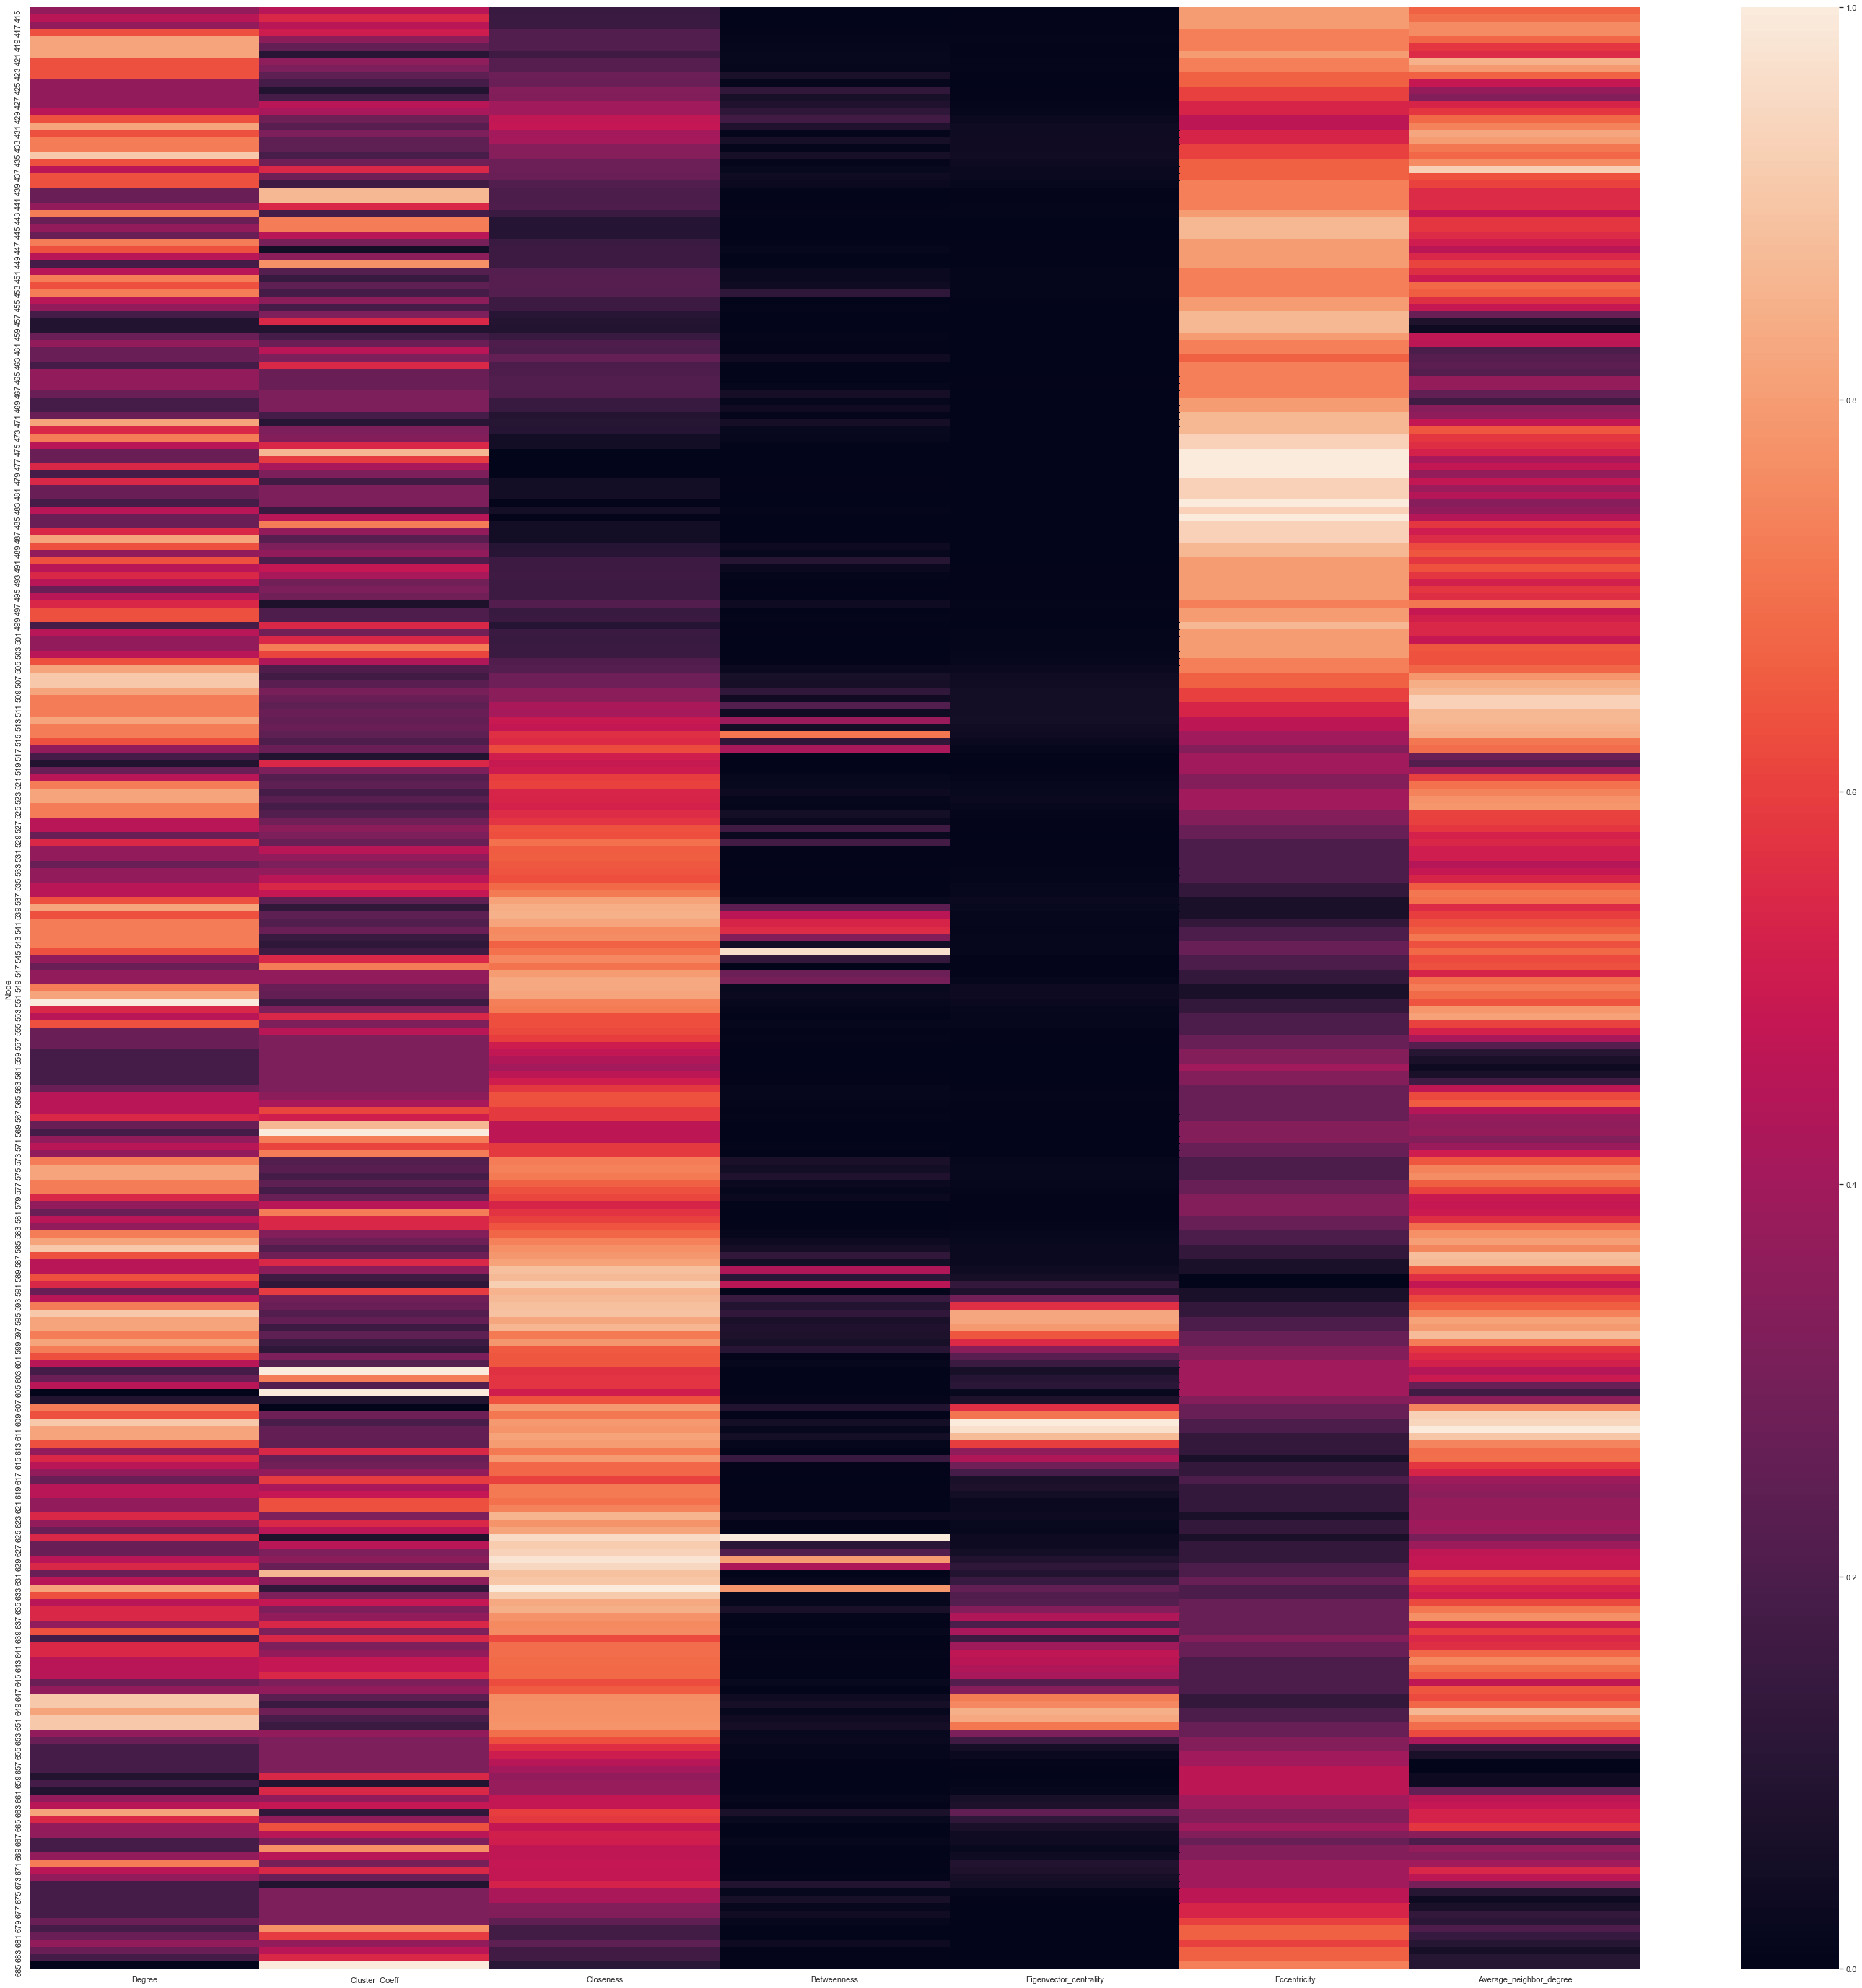

In [20]:
hm = sns.heatmap(delta2.iloc[400:800])
figure = hm.get_figure()
figure.savefig('heatmap_delta_scaled.png', dpi=400)

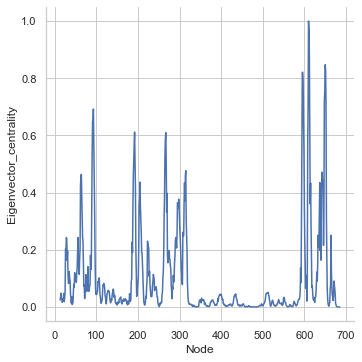

In [21]:
sns.relplot(x='Node', y='Eigenvector_centrality',kind='line', data=delta2)

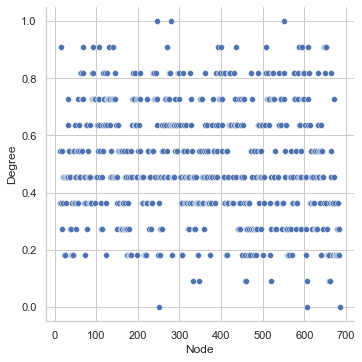

In [22]:
sns.relplot(x='Node', y='Degree', data=delta2)

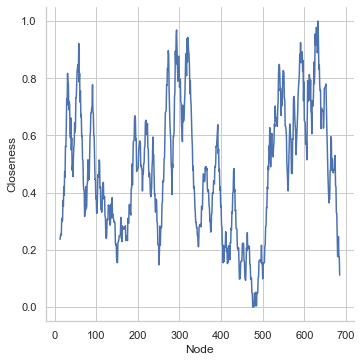

In [23]:
sns.relplot(x='Node', y='Closeness',kind='line', data=delta2)

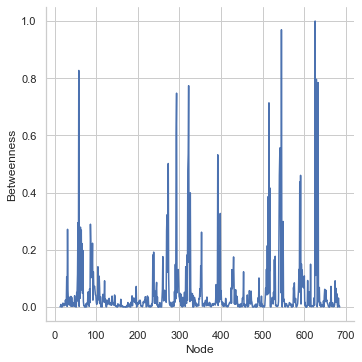

In [24]:
sns.relplot(x='Node', y='Betweenness',kind='line', data=delta2)

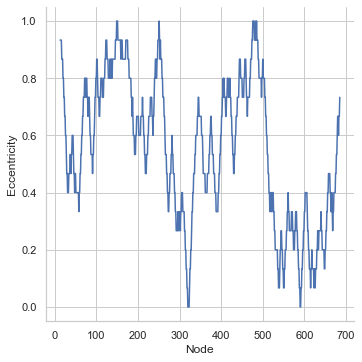

In [25]:
sns.relplot(x='Node', y='Eccentricity',kind='line', data=delta2)

In [27]:
delta2_crop = delta2.iloc[400:800]
for col in ['Degree', 'Cluster_Coeff', 'Closeness', 'Betweenness', 'Eigenvector_centrality', 'Eccentricity']:
    print(f'TOP 5 Values in {col}:')
    print(delta2_crop.nlargest(10, col))
    print(f'BOTTOM 5 Values in {col}:')
    print(delta2_crop.nsmallest(5, col))
    print("----------------------------------------------")

TOP 5 Values in Degree:
        Degree  Cluster_Coeff  Closeness  Betweenness  Eigenvector_centrality  \
Node                                                                            
552   1.000000       0.160838   0.731204     0.016159                0.030976   
435   0.909091       0.194215   0.339704     0.060336                0.045604   
507   0.909091       0.173553   0.281474     0.065775                0.037846   
508   0.909091       0.235537   0.283445     0.059980                0.046013   
586   0.909091       0.214875   0.768732     0.056467                0.025523   
595   0.909091       0.214875   0.892151     0.129278                0.820394   
610   0.909091       0.194215   0.789959     0.053383                1.000000   
648   0.909091       0.235537   0.764506     0.038901                0.722855   
649   0.909091       0.152892   0.766492     0.061928                0.752907   
651   0.909091       0.194215   0.771989     0.039445                0.829733   

   

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(delta2)

PCA(n_components=2)

In [29]:
pca.components_

array([[ 0.30222244, -0.18574084,  0.58956922,  0.15170107,  0.28389185,
        -0.60159812,  0.24706676],
       [-0.61964984,  0.36897488,  0.2382268 , -0.00574405, -0.15268174,
        -0.44834751, -0.44584685]])

In [30]:
pca.explained_variance_ratio_

array([0.46845279, 0.26021593])

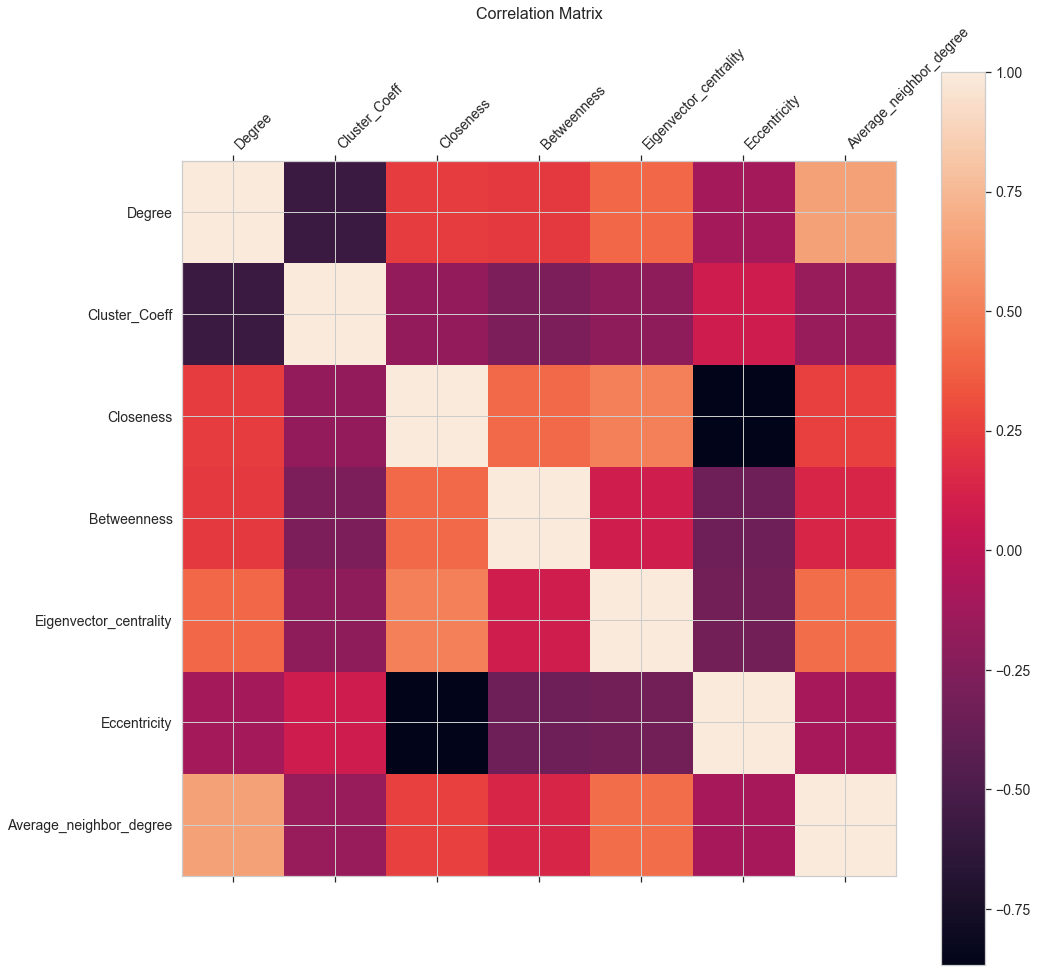

In [31]:
import matplotlib.pyplot as plt
df = delta2
plt.matshow(df.corr())
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha='left')
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [32]:
data2 = pd.read_csv('vasan_CAonly_Cchain.txt', delim_whitespace=True)
data2['Node'] = data2['Node'].astype('str').str[1:]
data2['Node'] = data2['Node'].astype('int64')
data2.index = data2['Node']

In [33]:
data2 = data2.drop(columns=['Node'], axis=1)

In [34]:
scaler = MinMaxScaler()
data2scaled = pd.DataFrame(scaler.fit_transform(data2), columns=cols_scaled)

In [35]:
wuhan2 = data2scaled
wuhan2.index = data2.index
wuhan2.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
27,0.272727,0.640000,0.496371,0.000156,0.0,0.48,0.559763
28,0.363636,0.679999,0.554247,0.001161,0.0,0.44,0.650888
29,0.545455,0.400000,0.625010,0.031677,0.0,0.40,0.602071
30,0.454545,0.600000,0.620258,0.000295,0.0,0.40,0.660186
31,0.727273,0.386667,0.696857,0.116040,0.0,0.36,0.611834


In [36]:
corrs = wuhan2.corrwith(delta2, axis=1)

<AxesSubplot:ylabel='Node'>

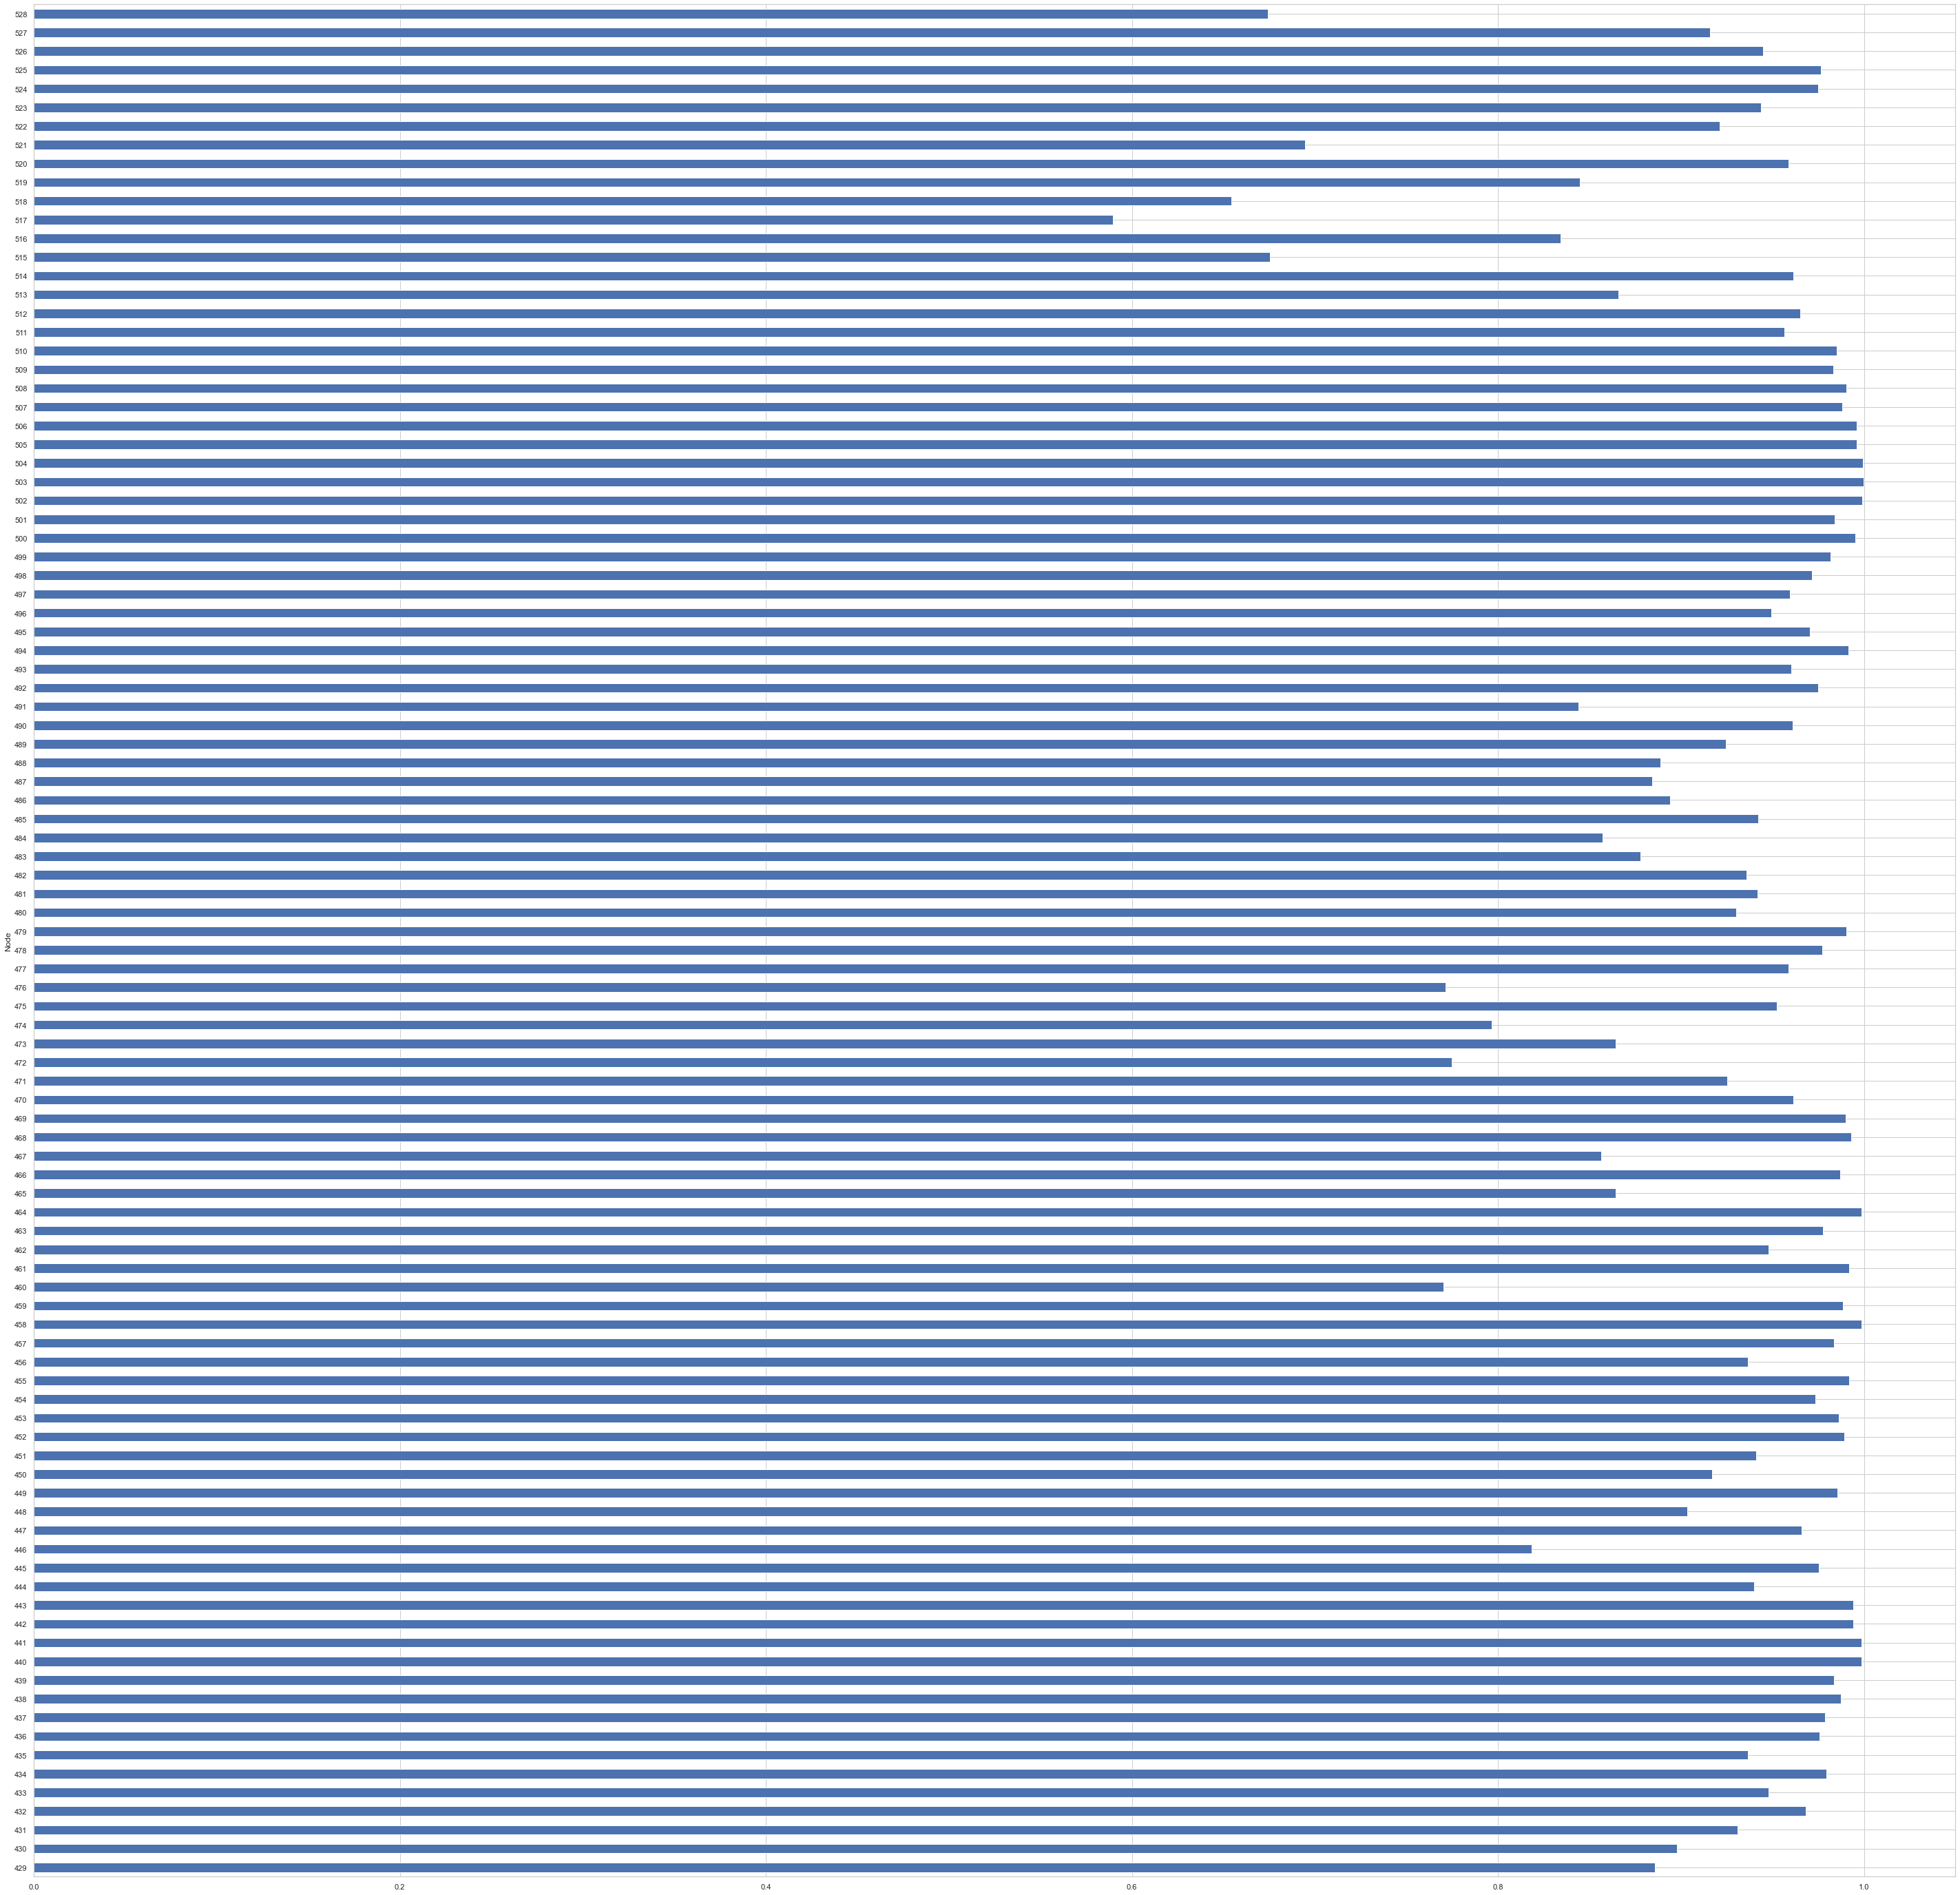

In [37]:
corrs.iloc[400:500].plot(kind='barh')

<AxesSubplot:ylabel='Node'>

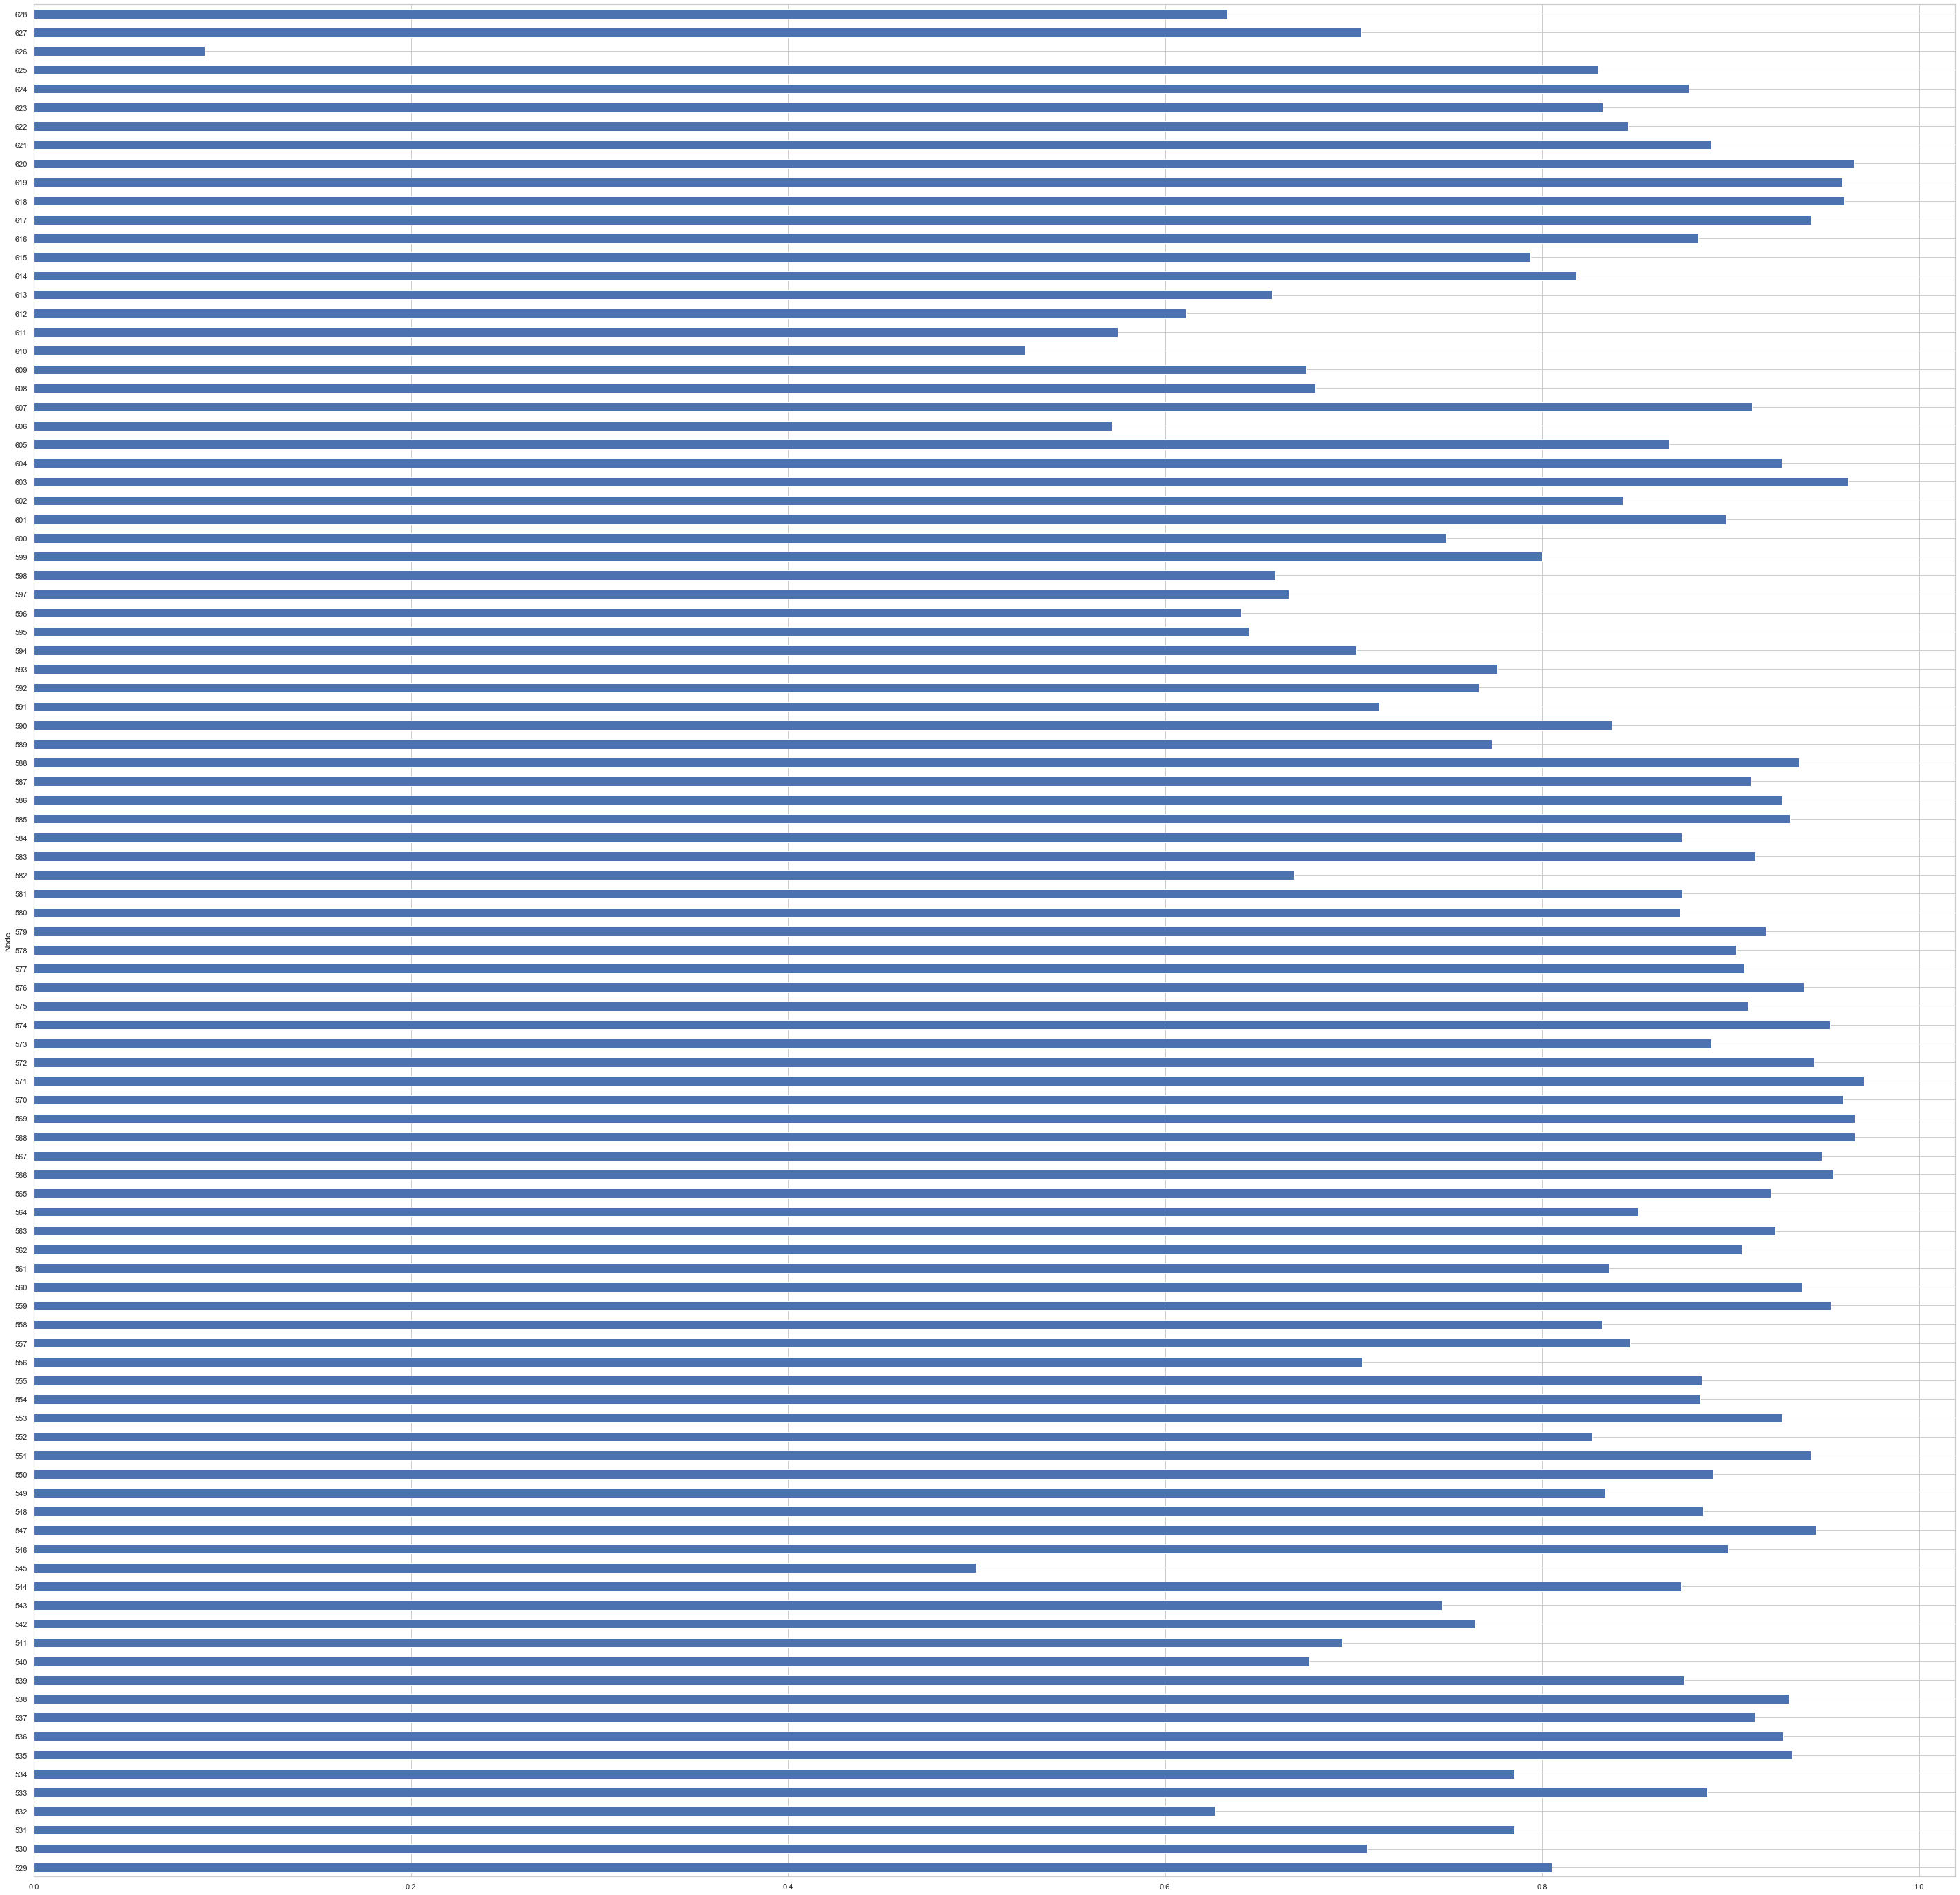

In [38]:
corrs.iloc[500:600].plot(kind='barh')

<AxesSubplot:ylabel='Node'>

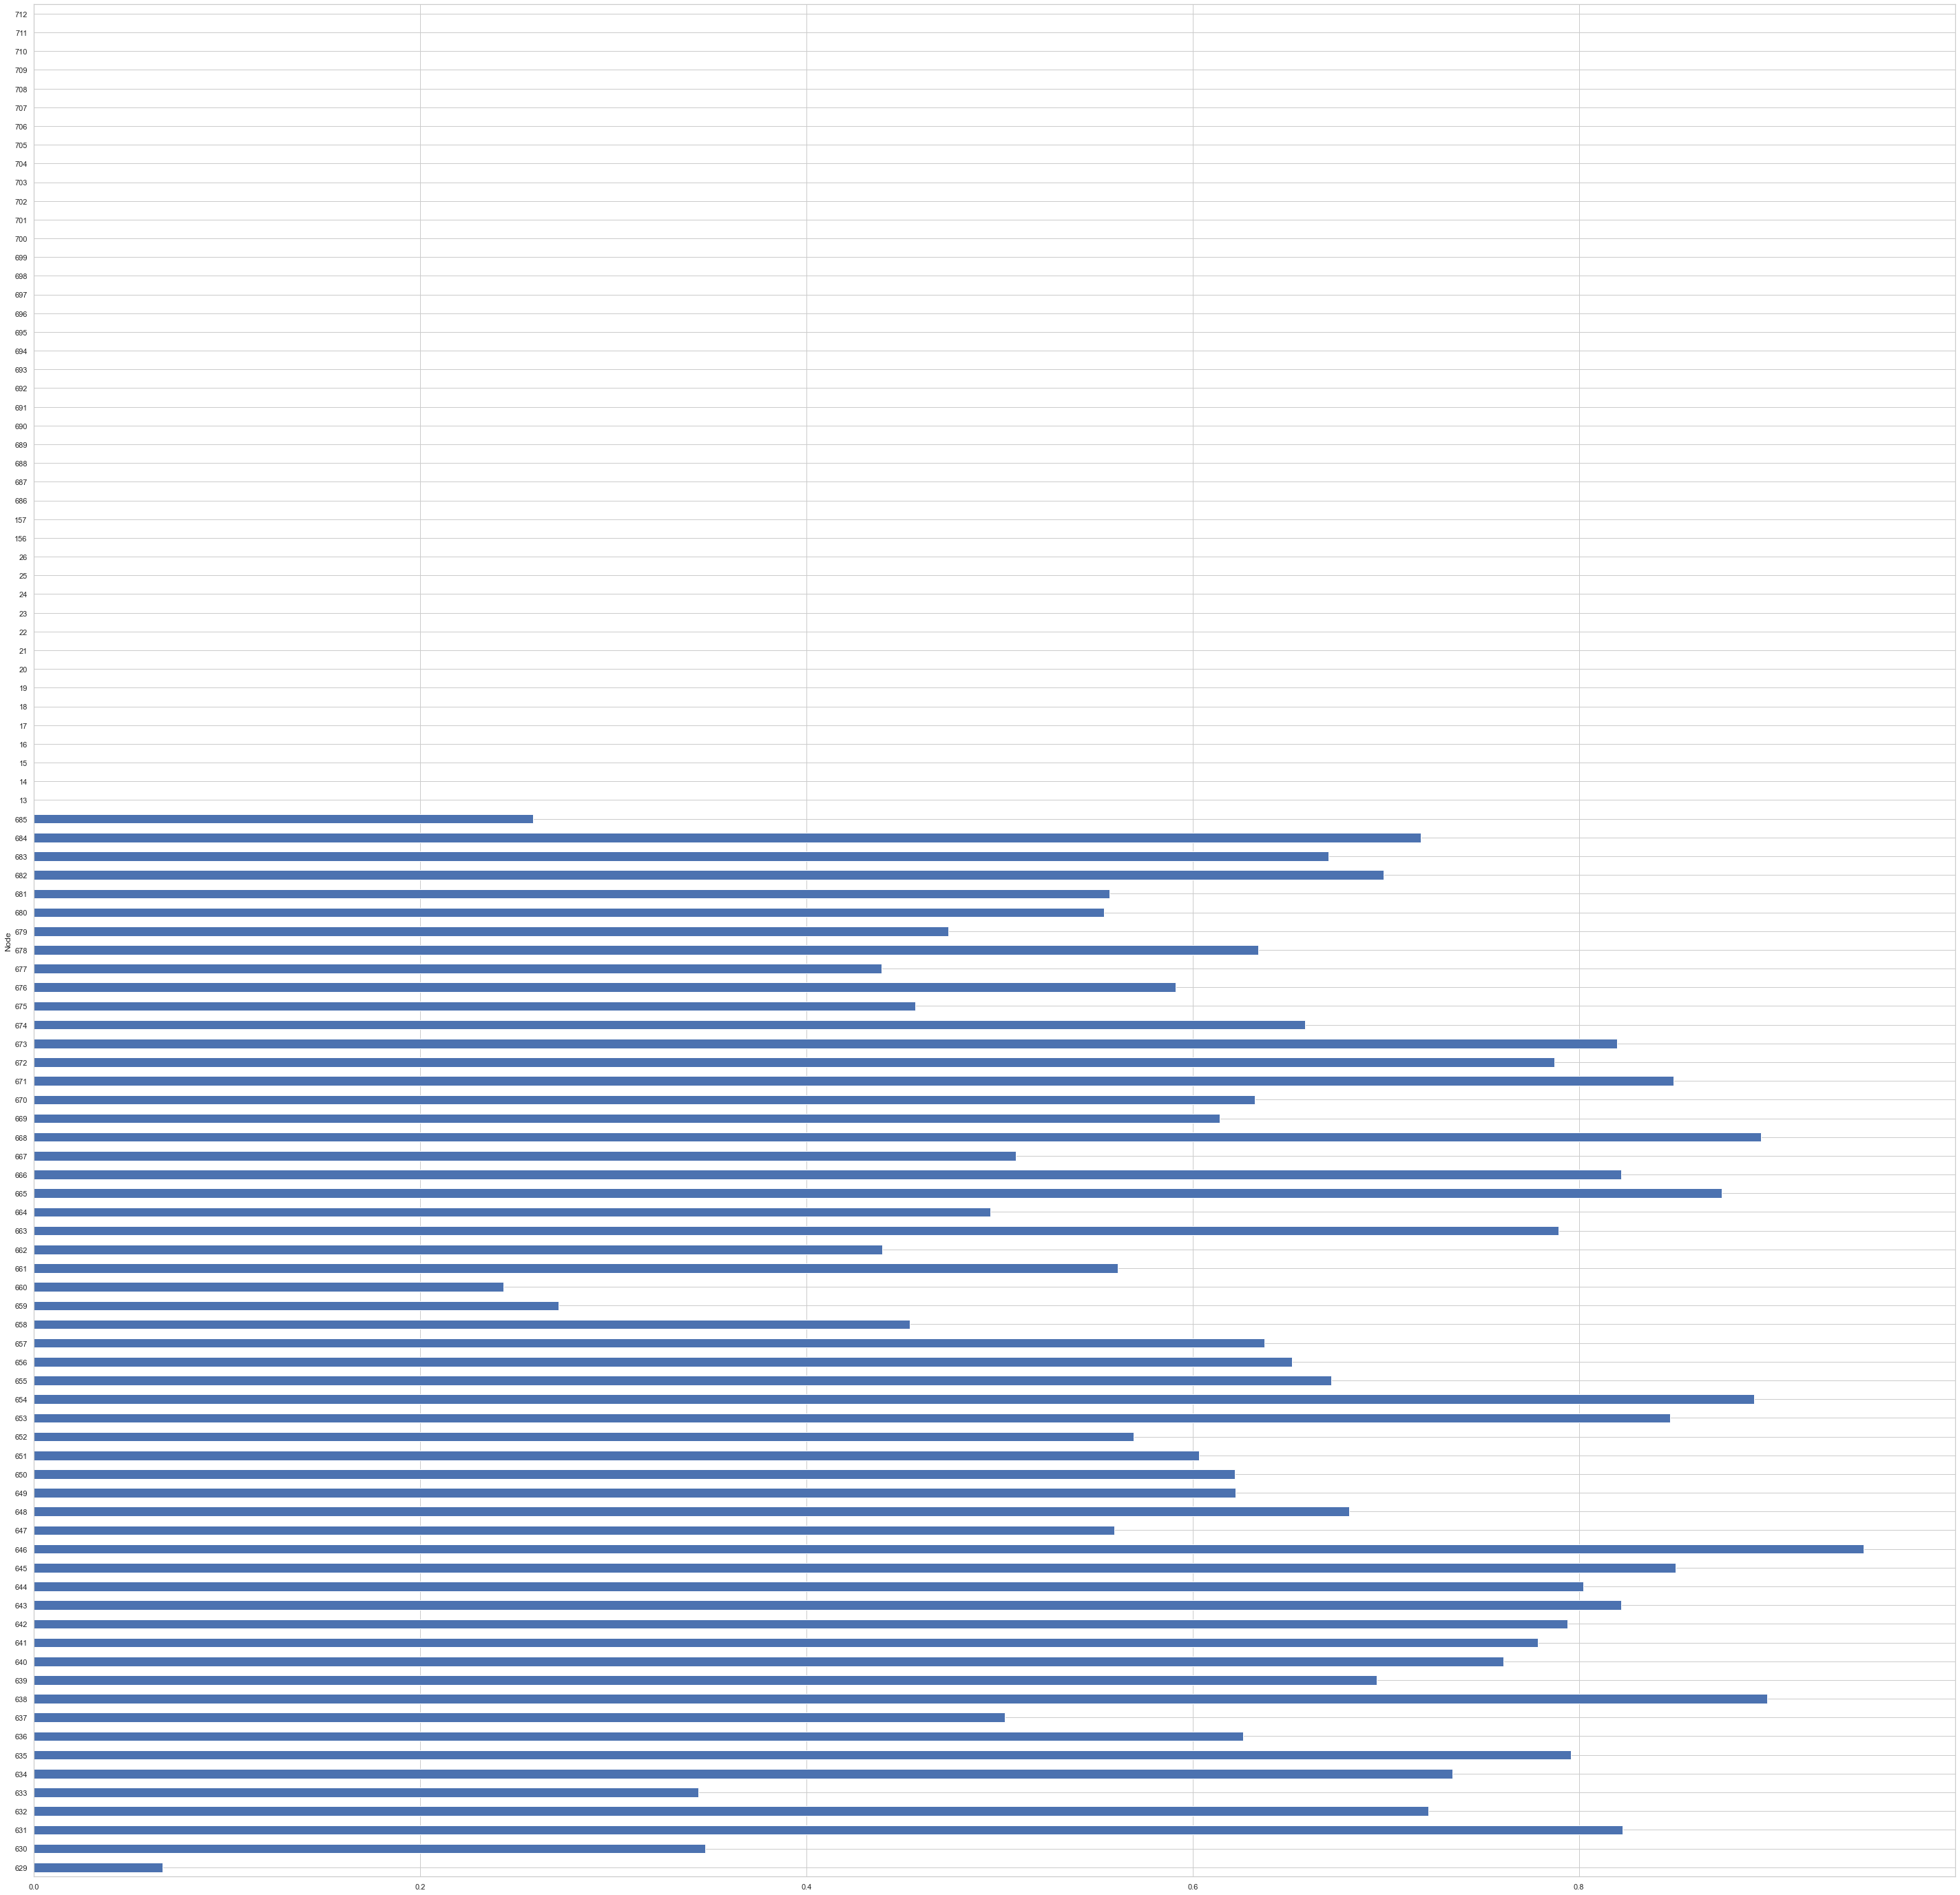

In [39]:
corrs.iloc[600:700].plot(kind='barh')

In [40]:
corrs.nlargest(20)

Node
503    0.999808
504    0.999355
502    0.999060
343    0.998908
464    0.998735
458    0.998620
410    0.998537
440    0.998479
441    0.998479
403    0.996121
405    0.996047
415    0.996000
505    0.995828
506    0.995806
500    0.995386
416    0.994952
407    0.994450
442    0.994227
443    0.994135
152    0.994132
dtype: float64

In [41]:
corrs.nsmallest(10)

Node
629    0.066750
626    0.090444
68     0.218576
660    0.243094
180    0.252307
685    0.258587
659    0.271651
633    0.343916
630    0.347624
138    0.364854
dtype: float64

In [42]:
%store delta2
%store wuhan2

Stored 'delta2' (DataFrame)
Stored 'wuhan2' (DataFrame)
